# HW2
1. 
* Create a cloud of particles (N = $10^5$) distributed by a normal distribution (mean is zero and variance is one) in 3D Cartesian coordinates. 
* Assuming the initial particle velocities and accelerations are distributed by the same normal distribution and the total mass of the system is 20. 
* Run your N body simulation from t = 0 up to t = 10 with a constant time step ∆t = 0.01. 
* Use a soften length rsoft = 0.01. 
* Make snapshots of your particles projected on the x − y plane at t = 0, 2, 4, 6, 8, 10. 
* Make sure you have modified the particle size and the opacity to make it clear on the plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HW2_particles import Particles
from HW2_simulator import NBodySimulator
from HW2_visualization import load_files, save_movie
from numba import set_num_threads
from numba import jit, prange, njit
"""
from nbody.particles import Particles
from nbody.simulator import NBodySimulator
"""

# Set the number of threads to use for numba
nthreads = 8
set_num_threads(nthreads)

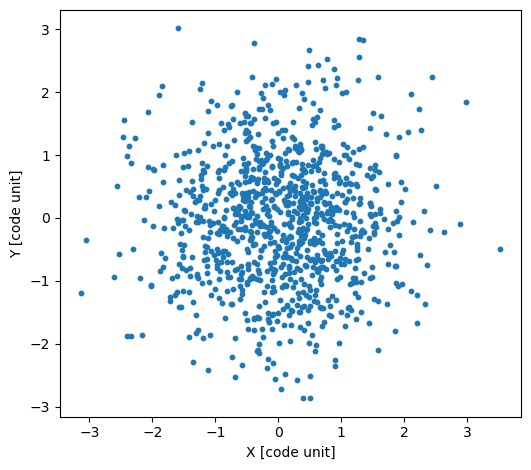

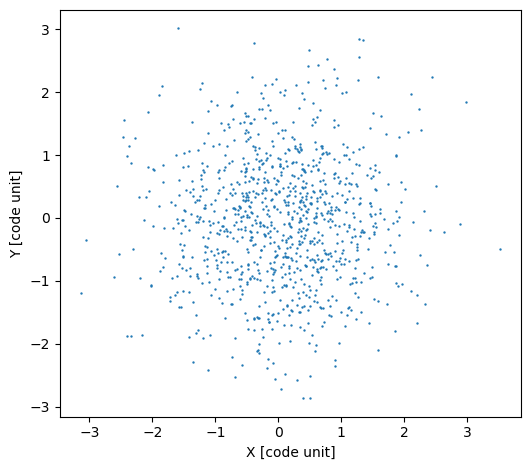

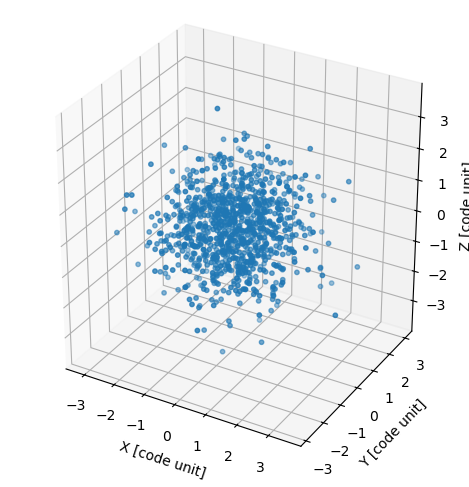

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X [code unit]', ylabel='Y [code unit]', zlabel='Z [code unit]'>)

In [2]:
time          = 0    # the starting  time
num_particles = 10000  # number of particles

# send N=num_particles to __init__ to initialize attributes
# create an Instance called particles
particles = Particles(N=num_particles)

# assign the value to particle's (instance) attributes
particles.masses = np.full((num_particles,1), 20/num_particles)
particles.positions = np.random.randn(num_particles, 3)
particles.velocities = np.random.randn(num_particles, 3)
particles.accelerations = np.random.randn(num_particles, 3)
particles.tags = np.linspace(1,num_particles,num_particles)

# visualize the system
particles.draw(dim=2)
particles.draw(dim=2, size=0.5)
particles.draw(dim=3)

In [3]:
# start the simulation
simulation = NBodySimulator(particles=particles)
simulation.setup(G=1,rsoft=0.01,method='RK4', io_freq=10, io_header='cluster')
simulation.evolve(dt=0.01, tmax=10)

n= 0 Time:  0  dt:  0.01
n= 10 Time:  0.09999999999999999  dt:  0.01
n= 20 Time:  0.20000000000000004  dt:  0.01
n= 30 Time:  0.3000000000000001  dt:  0.01
n= 40 Time:  0.4000000000000002  dt:  0.01
n= 50 Time:  0.5000000000000002  dt:  0.01
n= 60 Time:  0.6000000000000003  dt:  0.01
n= 70 Time:  0.7000000000000004  dt:  0.01
n= 80 Time:  0.8000000000000005  dt:  0.01
n= 90 Time:  0.9000000000000006  dt:  0.01
n= 100 Time:  1.0000000000000007  dt:  0.01
n= 110 Time:  1.1000000000000008  dt:  0.01
n= 120 Time:  1.2000000000000008  dt:  0.01
n= 130 Time:  1.300000000000001  dt:  0.01
n= 140 Time:  1.400000000000001  dt:  0.01
n= 150 Time:  1.500000000000001  dt:  0.01
n= 160 Time:  1.6000000000000012  dt:  0.01
n= 170 Time:  1.7000000000000013  dt:  0.01
n= 180 Time:  1.8000000000000014  dt:  0.01
n= 190 Time:  1.9000000000000015  dt:  0.01
n= 200 Time:  2.0000000000000013  dt:  0.01
n= 210 Time:  2.099999999999999  dt:  0.01
n= 220 Time:  2.199999999999997  dt:  0.01
n= 230 Time:  2.299

['data_cluster/cluster_000000.dat', 'data_cluster/cluster_000010.dat', 'data_cluster/cluster_000020.dat', 'data_cluster/cluster_000030.dat', 'data_cluster/cluster_000040.dat', 'data_cluster/cluster_000050.dat', 'data_cluster/cluster_000060.dat', 'data_cluster/cluster_000070.dat', 'data_cluster/cluster_000080.dat', 'data_cluster/cluster_000090.dat', 'data_cluster/cluster_000100.dat', 'data_cluster/cluster_000110.dat', 'data_cluster/cluster_000120.dat', 'data_cluster/cluster_000130.dat', 'data_cluster/cluster_000140.dat', 'data_cluster/cluster_000150.dat', 'data_cluster/cluster_000160.dat', 'data_cluster/cluster_000170.dat', 'data_cluster/cluster_000180.dat', 'data_cluster/cluster_000190.dat', 'data_cluster/cluster_000200.dat', 'data_cluster/cluster_000210.dat', 'data_cluster/cluster_000220.dat', 'data_cluster/cluster_000230.dat', 'data_cluster/cluster_000240.dat', 'data_cluster/cluster_000250.dat', 'data_cluster/cluster_000260.dat', 'data_cluster/cluster_000270.dat', 'data_cluster/clust

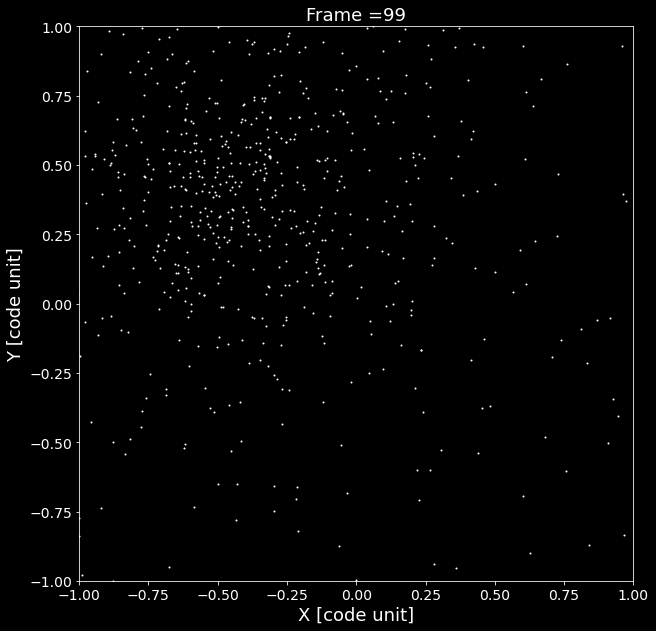

In [4]:
# visualize the simulation
fns = load_files('cluster')
print(fns)
# save the movie
save_movie(fns, filename='HW2.mp4', fps=10)